In this lab, you’ll explore the breast cancer dataset and try to train the model to predict if the person is having breast cancer or not. We will start off with a weak learner, a decision tree with maximum depth = 2.

We will then build an adaboost ensemble with 50 trees with a step of 3 and compare the performance with the weak learner.

Let's get started by loading the libraries.

In [1]:
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn import metrics
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')


We will use the breast cancer dataset in which the target variable has 1 if the person has cancer and 0 otherwise. Let's load the data.

In [2]:
cancer = load_breast_cancer()
digits = load_digits()

data = cancer

In [3]:
df = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= list(data['feature_names']) + ['target'])
df['target'] = df['target'].astype('uint16')

In [5]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [15]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [14]:
len(df.columns)

31

In [7]:
# adaboost experiments
# create x and y train
X = df.drop('target', axis=1)
y = df[['target']]

# split data into train and test/validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 30)
(455, 1)
(114, 30)
(114, 1)


In [21]:
from sklearn.feature_selection import SelectKBest,f_classif
select_features = SelectKBest(f_classif, k=15)
#demo = pd.read_csv("pima-indians-diabetes.data", names= colnames)

select_features.fit_transform(X, y)
select_features.pvalues_

array([8.46594057e-096, 4.05863605e-025, 8.43625104e-101, 4.73456431e-088,
       1.05185036e-018, 3.93826311e-056, 9.96655576e-084, 7.10115016e-116,
       5.73338403e-016, 7.59936804e-001, 9.73894866e-050, 8.43332029e-001,
       1.65190518e-047, 5.89552139e-046, 1.10296609e-001, 9.97599465e-013,
       8.26017617e-010, 3.07230877e-024, 8.76641818e-001, 6.30735508e-002,
       8.48229192e-116, 1.07805749e-030, 5.77139714e-119, 2.82884770e-097,
       6.57514363e-026, 7.06981635e-055, 2.46466396e-072, 1.96909971e-124,
       2.95112058e-025, 2.31643245e-015])

In [34]:
min(select_features.pvalues_)

1.969099707212886e-124

In [33]:
 f1 = [], index =0
for x in list(select_features.pvalues_):
    if x < 5:        
        f1[index] = x 
        index = index + 1
            

TypeError: cannot unpack non-iterable int object

In [8]:
# check the average cancer occurence rates in train and test data, should be comparable
print(y_train.mean())
print(y_test.mean())

target    0.626374
dtype: float64
target    0.631579
dtype: float64


In [8]:
# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

In [9]:
# fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# test error
y_pred = shallow_tree.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.9385964912280702

Now, we will see the accuracy using the AdaBoost algorithm. In this following code, we will write code to calculate the accuracy of the AdaBoost models as we increase the number of trees from 1 to 50 with a step of 3 in the lines:

'estimators = list(range(1, 50, 3))'

'for n_est in estimators:'

We finally end up with the accuracy of all the models in a single list abc_scores.

In [10]:
# adaboost with the tree as base estimator

estimators = list(range(1, 200, 3))

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABC.fit(X_train, y_train)
    y_pred = ABC.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    abc_scores.append(score)
    

In [11]:
abc_scores

[0.9473684210526315,
 0.9298245614035088,
 0.9473684210526315,
 0.9736842105263158,
 0.9385964912280702,
 0.9473684210526315,
 0.9473684210526315,
 0.956140350877193,
 0.9473684210526315,
 0.9736842105263158,
 0.9649122807017544,
 0.9824561403508771,
 0.9736842105263158,
 0.9736842105263158,
 0.9649122807017544,
 0.9912280701754386,
 0.9824561403508771,
 0.9824561403508771,
 0.9912280701754386,
 0.9824561403508771,
 0.9824561403508771,
 0.9736842105263158,
 0.9824561403508771,
 0.9912280701754386,
 0.9824561403508771,
 0.9912280701754386,
 0.9912280701754386,
 0.9736842105263158,
 0.9912280701754386,
 0.9912280701754386,
 0.9912280701754386,
 0.9649122807017544,
 0.9912280701754386,
 0.9912280701754386,
 0.9912280701754386,
 0.9912280701754386,
 0.9912280701754386,
 0.9824561403508771,
 0.9824561403508771,
 0.9736842105263158,
 0.9912280701754386,
 0.9912280701754386,
 0.9824561403508771,
 0.9912280701754386,
 0.9912280701754386,
 0.9912280701754386,
 0.9824561403508771,
 0.99122807017

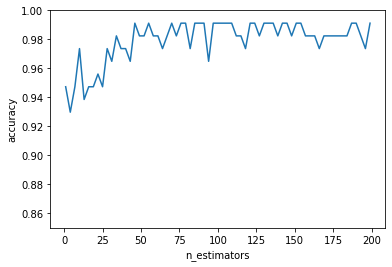

In [12]:
# plot test scores and n_estimators
# plot
plt.plot(estimators, abc_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.ylim([0.85, 1])
plt.show()